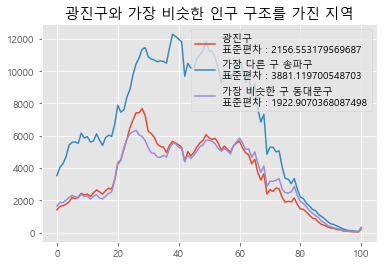

In [9]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)


f=open('202012_202012_.csv')
data=csv.reader(f)
next(data)

strict=[]
popular=[]
age=np.arange(101)
'''
age=[]
for i in range(0,101):
    age.append(i)
'''
for row in data:
    strict.append(row[0].split(" ")[1])
    popular_strict=[]
    for j in range(3,len(row)):
        row[j]=row[j].replace(',','')
        popular_strict.append(int(row[j]))
    popular.append(popular_strict)

#광진구 인덱스
gwangjin_idx=strict.index('광진구')
diff_set=[]
for i in range(len(popular)):
    summ=0
    for j in range(len(popular[i])):
        diff=popular[gwangjin_idx][j]-popular[i][j]
        summ=summ+diff**2
    diff_set.append(summ)
#print(diff_set)

diff_sort=diff_set.copy()
diff_sort.sort()
M_idx=diff_set.index(diff_sort[-1])
m_idx=diff_set.index(diff_sort[1])

'''
print(M_idx)
print(m_idx)

print(strict[M_idx])
print(strict[m_idx])
'''

# 표준편차 구하기(numpy)
gwangjin_np=np.array(popular[gwangjin_idx])
gjin_std=gwangjin_np.std(axis=0)
#print(gjin_std)//광진구 표준편차

most_diff_city=np.array(popular[M_idx])
most_std=most_diff_city.std(axis=0)
#print(most_std)//최대차이 구 표준편차

least_diff_city=np.array(popular[m_idx])
least_std=least_diff_city.std(axis=0)
#print(least_std)//최소차이 구 표준편차


plt.title('광진구와 가장 비슷한 인구 구조를 가진 지역')
plt.style.use('ggplot')
plt.plot(popular[gwangjin_idx], label='광진구 \n표준편차 : {}'.format(gjin_std))
plt.plot(popular[M_idx], label='가장 다른 구 {} \n표준편차 : {}'.format(strict[M_idx],most_std))
plt.plot(popular[m_idx], label='가장 비슷한 구 {} \n표준편차 : {}'.format(strict[m_idx],least_std))
plt.legend()
plt.show()

